# **Assignment 1**
### <span style="color:violet">*Understanding the role of Gender & Occupation on Stress Levels and BMI on Heart Rate*</span>
*Prepared by Maheen Mohammad Alim*
<br>*Student ID: 100878291*

The Sleep Health and Lifestyle Dataset, encompassing 374 individuals, provides a detailed exploration of sleep, health, and daily life. The dataset includes demographic information, health indicators (such as sleep duration and the presence of sleep disorders), and lifestyle elements like physical activity, stress, BMI, and cardiovascular health measures.
I plan on investigating how Body Mass Index (BMI) connects with heart rate. Additionally, I'll see how stress levels are influenced by gender and occupation. The goal is to get a clear picture of how these factors relate in this diverse group.

## Methods

### Processing Data

The dataset used in this analysis was sourced from a Kaggle repository [1].

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [116]:
#Where are we?
import os
os.getcwd()

#Using Panda's to read the csv file
health_data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

#Using data to make a Data Frame with the necessary columns needed for this analysis
health = pd.DataFrame(health_data)

### Cleaning Data

The dataset lacked explicit units for the recorded numerical data, so I assigned units based on information sourced from [1] to ensure clarity, by renaming the column headings.

In [117]:
#Renaming the column headings
health.columns = ["Person ID", "Gender", "Age", "Occupation", "Sleep Duration (hours)", "Sleep Quality (out of 10)", 
                  "Physical Activity (min/day)", "Stress Level (out of 10)", "BMI", "Blood Pressure", "Heart Rate (bpm)", 
                  "Daily Steps", "Sleep Disorder"]

Looking for missing values (NaN) in the pertinent columns for this analysis.

In [118]:
health[health.Gender.isna()]

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Sleep Quality (out of 10),Physical Activity (min/day),Stress Level (out of 10),BMI,Blood Pressure,Heart Rate (bpm),Daily Steps,Sleep Disorder


In [119]:
health[health.Occupation.isna()]

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Sleep Quality (out of 10),Physical Activity (min/day),Stress Level (out of 10),BMI,Blood Pressure,Heart Rate (bpm),Daily Steps,Sleep Disorder


In [120]:
health[health.BMI.isna()]

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Sleep Quality (out of 10),Physical Activity (min/day),Stress Level (out of 10),BMI,Blood Pressure,Heart Rate (bpm),Daily Steps,Sleep Disorder


In [121]:
health[health["Stress Level (out of 10)"].isna()]

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Sleep Quality (out of 10),Physical Activity (min/day),Stress Level (out of 10),BMI,Blood Pressure,Heart Rate (bpm),Daily Steps,Sleep Disorder


In [122]:
health[health["Heart Rate (bpm)"].isna()]

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Sleep Quality (out of 10),Physical Activity (min/day),Stress Level (out of 10),BMI,Blood Pressure,Heart Rate (bpm),Daily Steps,Sleep Disorder


There were no missing data entries in the pertinent columns.

Removing the column "Person ID" since it was unnecessary as the index serves the purpose of tracking the number of data entries in this dataset.

In [123]:
#Dropping unnecessary columns
health = health.drop(["Person ID"], axis=1)

There are 242 duplicates in this datset.

In [124]:
#Looking for duplicates in the dataset 
health[health.duplicated()]
#There are 242 duplicates

,Gender,Age,Occupation,Sleep Duration (hours),Sleep Quality (out of 10),Physical Activity (min/day),Stress Level (out of 10),BMI,Blood Pressure,Heart Rate (bpm),Daily Steps,Sleep Disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
11,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Removing the duplicate data entries.

In [125]:
#Dropping those 242 Duplicates
health = health.drop_duplicates()

Resetting the index since the duplicates were removed.

In [126]:
#Resetting the index using reset_index and dropping the old index
health = health.reset_index(drop=True)
display(health)

,Gender,Age,Occupation,Sleep Duration (hours),Sleep Quality (out of 10),Physical Activity (min/day),Stress Level (out of 10),BMI,Blood Pressure,Heart Rate (bpm),Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
3,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
4,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...
127,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,NaN
128,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,NaN
129,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
130,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## Analysis

I plan to investigate the connections between gender and occupation concerning stress levels, as well as explore the impact of BMI on heart rate through exploratory analysis, consisiting of statistical summaries and data visualizations.

### Understanding Descriptive Statistics

The following count plot shows that majority of the people who provided their data are Nurses, Engineers and Doctors followed by other occupations.

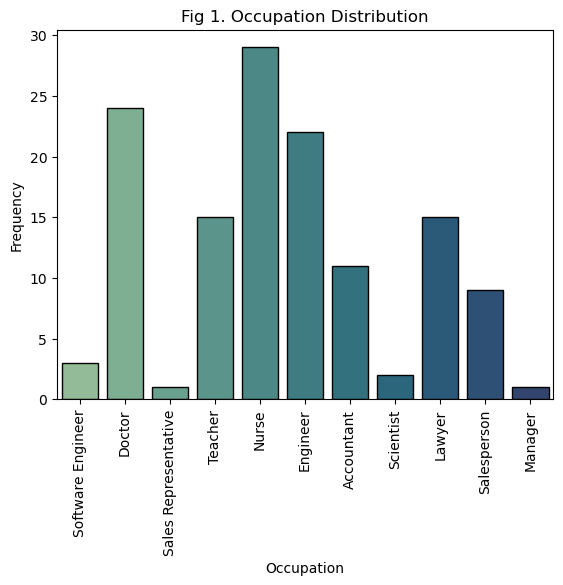

In [127]:
#Generating a countplot, visualizing the distribution of various occupations
o = sns.countplot(x="Occupation", data=health, palette="crest", edgecolor="black").set(title="Fig 1. Occupation Distribution", 
                                                                                        xlabel="Occupation", ylabel="Frequency")
plt.xticks(rotation=90)
plt.show(o)

The following data shows the exact frequencies for different occupations.

In [128]:
health.Occupation.value_counts()

Occupation
Nurse                   29
Doctor                  24
Engineer                22
Teacher                 15
Lawyer                  15
Accountant              11
Salesperson              9
Software Engineer        3
Scientist                2
Sales Representative     1
Manager                  1
Name: count, dtype: int64

The following count plot shows that there were almost the same number of males and females who provided their data.

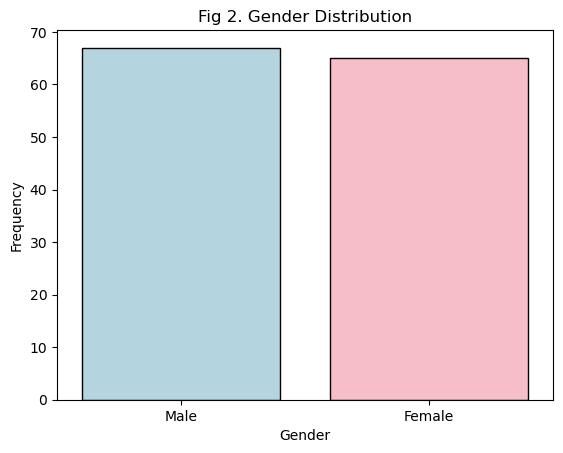

In [129]:
#Generating a countplot, visualizing the distribution of genders
g = sns.countplot(x="Gender", data=health, palette=["lightblue","lightpink"], edgecolor="black").set(title="Fig 2. Gender Distribution", 
                                                                                xlabel="Gender", ylabel="Frequency")

The following data shows the exact number of males and females who provided their data.

In [130]:
health.Gender.value_counts()

Gender
Male      67
Female    65
Name: count, dtype: int64

Replacing "Normal" to "Normal Weight" for plotting and data accuracy.

In [131]:
#Replacing "Normal" to "Normal Weight" in "BMI" for plotting and data accuracy
health = health.replace({'BMI': {"Normal": 'Normal Weight'}})

The following pie chart shows the distribution various BMI categories in this dataset. It can be seen that most of the people who provoded their data were Normal Weight followed by Overweight and Obese.

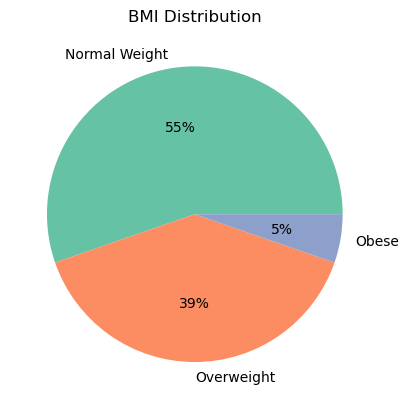

In [132]:
#Caclulating the count of each bmi category
bmi_counts = health.BMI.value_counts()

#Defining labels for the pie chart
labels = ["Normal Weight", "Overweight", "Obese"]

#Defining a seaborn color paltte for the pie chart
colors = sns.color_palette("Set2")

#Plotting a pie chart using the counts of each BMI category and labels
plt.pie(bmi_counts, labels=labels, colors=colors, autopct="%1.0f%%")
plt.title("BMI Distribution")
plt.show()

### Gender and Occupation on Stress Levels

The table below offers a summary of stress levels, organized by both occupations and genders.

In [133]:
#Grouping the data by 'Occupation' and 'Gender' to calculate the mean stress levels and rounding the values to 2 decimal places
grouped1 = round(health.groupby(["Occupation","Gender"])[["Stress Level (out of 10)"]].mean().unstack(),2)
display(grouped1)

Stress Level (out of 10)      
Gender                                 Female  Male
Occupation                                         
Accountant                               4.70  6.00
Doctor                                   3.00  6.70
Engineer                                 3.00  5.08
Lawyer                                   5.50  5.08
Manager                                  5.00   NaN
Nurse                                    5.76   NaN
Sales Representative                      NaN  8.00
Salesperson                               NaN  7.00
Scientist                                7.00   NaN
Software Engineer                         NaN  6.33
Teacher                                  4.45  6.50

These stats show a connection between occupations and stress levels, as well as between gender and stress levels. Males usually feel more stress, ranging from 6 to 8, while females tend to have lower stress, ranging from 3 to 5. Jobs like Sales Representative, Salesperson, Scientist, Doctor, Lawyer, and Accountant come with higher stress levels.

Here's a graphical representation of how gender and occupations relate to stress levels.

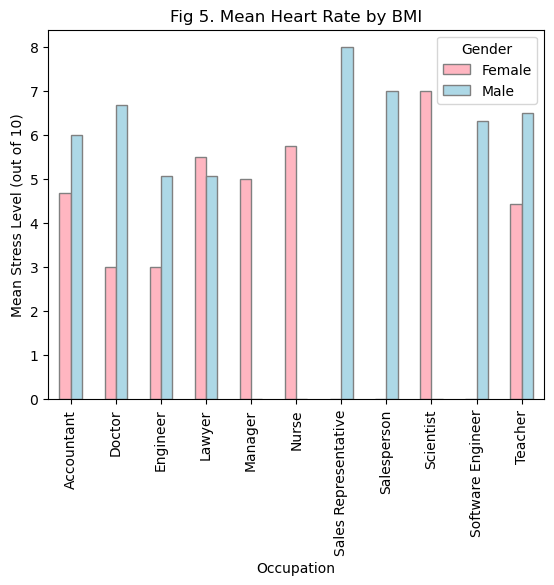

In [134]:
#Plotting the grouped1 data as a bar chart and coloring the bars for females with lightpink and the bars for males with lightblue
grouped1.plot.bar(stacked=False, color=["lightpink","lightblue"], edgecolor="grey", title="Fig 5. Mean Heart Rate by BMI")

#Labelling the axes
plt.xlabel("Occupation")
plt.ylabel("Mean Stress Level (out of 10)")

#Labelling and positioning the legend
plt.legend(["Female", "Male"], title="Gender")

#Rotating the x axis occupations for readability
plt.xticks(rotation=90) 
plt.show()

### BMI on Heart Rate

The table below offers a summary of heart rate, organized by BMI categories.

In [135]:
#Grouping the data by "BMI" to calculate the mean heart rate and rounding the values to 2 decimal places and also reindexing for linearity in plotting
grouped2 = round(health.groupby("BMI")[["Heart Rate (bpm)"]].mean().reindex(["Normal Weight", "Overweight", "Obese"]),2)
display(grouped2)

,Heart Rate (bpm)
BMI,
Normal Weight,69.51
Overweight,71.85
Obese,84.14


These stats show a possible connection between higher body weight and an increase in resting heart rate. Those with Normal Weight have a heart rate of about 69 beats per minute, while those who are Overweight have a slightly higher rate of around 72 beats per minute. However, individuals classified as Obese have a noticeably higher heart rate, averaging around 84 beats per minute.

Here's a graphical representation of how BMI relates to heart rate.

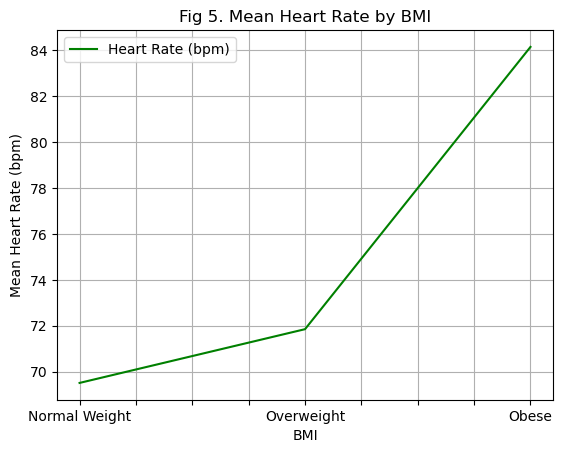

In [136]:
#Plotting the grouped2 data as a line chart
grouped2.plot.line(color="green", title="Fig 5. Mean Heart Rate by BMI")

#Labelling the axes
plt.xlabel("BMI")
plt.ylabel("Mean Heart Rate (bpm)")

#Showing the grid
plt.grid(True)
plt.show()

## Discussion

#### Gender and Occupation on Stress Levels
A discernible trend emerges when examining stress levels across occupations and genders. Overall, females tend to experience slightly lower average stress levels ranging from 3 to 5, compared to males ranging from 6 to 8. Within specific professions, this trend varies significantly. For instance, while female doctors exhibit a stress level of 3.00, their male counterparts report higher stress levels. Similarly, female engineers experience lower stress than male engineers. Certain professions, such as accounting and teaching, display relatively similar stress levels between genders. The highest stress-inducing occupation differs for each gender, with female scientists reporting a stress level of 7.00 and male sales representatives at 8.00. Establishing healthy boundaries, maintaining a balanced lifestyle, and considering professional help when necessary are key components in managing these stress levels.

#### BMI on Heart Rate
Generally, as the BMI category increases from Normal Weight to Overweight and then to Obese, there's a trend of higher heart rates. This pattern indicates a positive correlation between BMI and heart rate. This data suggests the importance of comprehensive health assessments that consider both BMI and heart rate. It serves as a prompt for individuals, particularly those in higher BMI categories, to monitor their heart health and consult healthcare professionals for medical advice.

## References
1. Source data - https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
2. Pandas for data manipulation
3. Seaborn for data visualization
4. Matplotlib for data visualization